UnitedStates_COVID_19_dataset

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before. It is a contiguous virus which started from Wuhan in December 2019. Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths alone in USA.The dataset  is provided to identify the deaths and recovered cases.



https://github.com/dsrscientist/COVID_19_Datasets/blob/master/csse_covid_19_daily_reports_us.csv

USA daily state reports (csse_covid_19_daily_reports_us)



This table contains an aggregation of each USA State level data. 

File naming convention
Field description
Province_State - The name of the State within the USA.
Country_Region - The name of the Country (US).
Last_Update - The most recent date the file was pushed.
Lat - Latitude.
Long_ - Longitude.
Confirmed - Aggregated confirmed case count for the state.
Deaths - Aggregated Death case count for the state.
Recovered - Aggregated Recovered case count for the state.
Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
Incident_Rate - confirmed cases per 100,000 persons.
People_Tested - Total number of people who have been tested.
People_Hospitalized - Total number of people hospitalized.
Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
UID - Unique Identifier for each row entry.
ISO3 - Officialy assigned country code identifiers.
Testing_Rate - Total number of people tested per 100,000 persons.
Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.


Field description
FIPS: US only. Federal Information Processing Standards code that uniquely identifies counties within the USA.
Admin2: County name. US only.
Province_State: Province, state or dependency name.
Country_Region: Country, region or sovereignty name. The names of locations included on the Website correspond with the official designations used by the U.S. Department of State.
Last Update: MM/DD/YYYY HH:mm:ss (24 hour format, in UTC).
Lat and Long_: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.
Confirmed: Confirmed cases include presumptive positive cases and probable cases, in accordance with CDC guidelines as of April 14.
Deaths: Death totals in the US include confirmed and probable, in accordance with CDC guidelines as of April 14.
Recovered: Recovered cases outside China are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project.
Active: Active cases = total confirmed - total recovered - total deaths.
Incidence_Rate: Admin2 + Province_State + Country_Region.
Case-Fatality Ratio (%): = confirmed cases per 100,000 persons.
US Testing Rate: = total test results per 100,000 persons. The "total test results" is equal to "Total test results (Positive + Negative)" from COVID Tracking Project.
US Hospitalization Rate (%): = Total number hospitalized / Number confirmed cases. The "Total number hospitalized" is the "Hospitalized – Cumulative" count from COVID Tracking Project. The "hospitalization rate" and "hospitalized - Cumulative" data is only presented for those states which provide cumulative hospital data.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [42]:
#loading dataset
covid= pd.read_excel('COVID 19.xlsx')
covid.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [43]:
covid.dtypes

Province_State                  object
Country_Region                  object
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                           int64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                            object
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

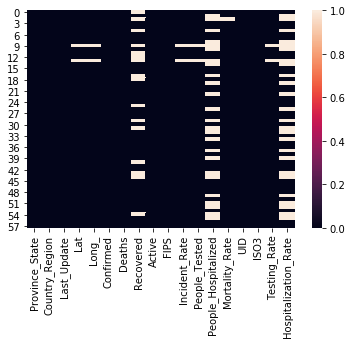

In [44]:
sns.heatmap(covid.isnull())

In [45]:
top10_confirmed = pd.DataFrame(covid.groupby('Province_State')['Confirmed'].sum().nlargest(10).sort_values(ascending = False))
fig1 = px.scatter(top10_confirmed, x = top10_confirmed.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top10_confirmed.index, title = 'Top 10 Confirmed Cases State')
fig1.show()

In [46]:
top10_deaths = pd.DataFrame(covid.groupby('Province_State')['Deaths'].sum().nlargest(10).sort_values(ascending = True))
fig2 = px.bar(top10_deaths, x = 'Deaths', y = top10_deaths.index, height = 600, color = 'Deaths', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 10 Death Cases State')
fig2.show()

In [47]:
top10_recovered = pd.DataFrame(covid.groupby('Province_State')['Recovered'].sum().nlargest(10).sort_values(ascending = False))
fig3 = px.bar(top10_recovered, x = top10_recovered.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Top 10 Recovered Cases States', color_continuous_scale = px.colors.sequential.Viridis)
fig3.show()

In [48]:
top10_active = pd.DataFrame(covid.groupby('Province_State')['Active'].sum().nlargest(10).sort_values(ascending = True))
fig4 = px.bar(top10_active, x = 'Active', y = top10_active.index, height = 600, color = 'Active', orientation = 'h',
             color_continuous_scale = ['paleturquoise','blue'], title = 'Top 10 Active Cases State')
fig4.show()

In [49]:
topstates_us = covid['Country_Region'] == 'US'
topstates_us = covid[topstates_us].nlargest(5, 'Confirmed')
fig5 = go.Figure(data = [
    go.Bar(name = 'Active Cases', x = topstates_us['Active'], y = topstates_us['Province_State'], orientation = 'h'),
    go.Bar(name = 'Death Cases', x = topstates_us['Deaths'], y = topstates_us['Province_State'], orientation = 'h')
])
fig5.update_layout(title = 'Most Affected States in USA', height = 600)
fig5.show()

In [50]:
topstates_us = covid['Country_Region'] == 'US'
topstates_us = covid[topstates_us].nlargest(5, 'Confirmed')
fig5 = go.Figure(data = [
    go.Bar(name = 'People Tested', x = topstates_us['People_Tested'], y = topstates_us['Province_State'], orientation = 'h'),
    go.Bar(name = 'People Hospitalized', x = topstates_us['People_Hospitalized'], y = topstates_us['Province_State'], orientation = 'h')
])
fig5.update_layout(title = 'Most Affected States in USA', height = 600)
fig5.show()

In [51]:
region = pd.DataFrame(covid.groupby('Province_State')['Confirmed'].sum())

labels = region.index
values = region['Confirmed']

fig9 = go.Figure(data=[go.Pie(labels = labels, values = values, pull=[0, 0, 0, 0, 0.2, 0])])

fig9.update_layout(title = 'WHO Region-Wise Case Distribution', width = 1000, height = 1000, 
                   margin = dict(t = 0, l = 0, r = 0, b = 0))

fig9.show()